In [185]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [1]:
pwd

'D:\\learnings\\Internship\\assignment_questions\\ML\\ML_-Datasets-main\\ML_-Datasets-main\\Temperature Forecast'

In [50]:
df = pd.read_csv('loan_prediction.csv',header=None)

In [51]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [52]:
columns = {
          0:'Loan_ID',
          1:'Gender',
          2:'Married',
          3:'Dependents',
          4:'Education',
          5:'Self_employed',
          6:'Applicant_income',
          7:'CoapplicantIncome',
          8:'Loan_amount',
          9:'Loan_Amount_Term',
          10:'Credit_history',
          11:'Property_Area',
          12:'Loan_Status'
          }
df = df.rename(columns=columns)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_employed      582 non-null    object 
 6   Applicant_income   614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_amount        592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_history     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [54]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_employed,Applicant_income,CoapplicantIncome,Loan_amount,Loan_Amount_Term,Credit_history,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
# df['Gender'].fillna('NoGenderSpecified',inplace=True)

In [56]:
def all_val_cnts(df):
    for col in df.columns:
        print('=+'*30)
        print(df[col].value_counts())

In [57]:
all_val_cnts(df)

=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Gender
Male      489
Female    112
Name: count, dtype: int64
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Married
Yes    398
No     213
Name: count, dtype: int64
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Self_employed
No     500
Yes     82
Name: count, dtype: int64
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Applicant_income
2500    9
4583    6
600

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_employed      582 non-null    object 
 6   Applicant_income   614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_amount        592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_history     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [59]:
df.describe()

,Applicant_income,CoapplicantIncome,Loan_amount,Loan_Amount_Term,Credit_history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [60]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_employed        32
Applicant_income      0
CoapplicantIncome     0
Loan_amount          22
Loan_Amount_Term     14
Credit_history       50
Property_Area         0
Loan_Status           0
dtype: int64

In [61]:
df.drop(columns=['Loan_ID'],inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_employed      582 non-null    object 
 5   Applicant_income   614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   Loan_amount        592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_history     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [63]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
df[num_cols].skew()

Applicant_income     6.539513
CoapplicantIncome    7.491531
Loan_amount          2.677552
Loan_Amount_Term    -2.362414
Credit_history      -1.882361
dtype: float64

we have a lot of skewness in applicant income and coapplicant income. To remove skewness we can use box_cox

In [76]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
nan_cats = [col for col in cat_cols if df[col].isnull().sum() > 0]
col_actuals = {}
for col in cat_cols:
    col_rep = {}
    if col in nan_cats:
        for i,j in enumerate(df[col].unique()[:-1]):
            col_rep[j] = i
    else:
        for i,j in enumerate(df[col].unique()):
            col_rep[j] = i
    col_actuals[col] = col_rep

we can make all categorical values look like numerical by replacing all the string except null values. Because null values yet to be handled

In [186]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_employed',
 'Property_Area',
 'Loan_Status']

In [200]:
from fancyimpute import KNN
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

In [195]:
#instantiate both packages to use
encoder = OrdinalEncoder()
imputer = KNNImputer()

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for column in cat_cols:
    encode(df[column])
    
    
    
# impute data and convert 
encode_data = pd.DataFrame(np.round(imputer.fit_transform(df)),columns = df.columns)

Imputing row 1/614 with 0 missing, elapsed time: 0.044
Imputing row 101/614 with 0 missing, elapsed time: 0.044
Imputing row 201/614 with 0 missing, elapsed time: 0.045
Imputing row 301/614 with 0 missing, elapsed time: 0.045
Imputing row 401/614 with 0 missing, elapsed time: 0.045
Imputing row 501/614 with 0 missing, elapsed time: 0.045
Imputing row 601/614 with 0 missing, elapsed time: 0.045


C:\Users\LEELA DURGA PRASAD\AppData\Roaming\Python\Python311\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


In [199]:
df.Gender.unique()

array([0., 3., 1., 2.])

In [78]:
nan_cats

['Gender', 'Married', 'Dependents', 'Self_employed']

In [79]:
col_actuals

{'Gender': {'Male': 0, 'Female': 1},
 'Married': {'No': 0, 'Yes': 1},
 'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3},
 'Education': {'Graduate': 0, 'Not Graduate': 1},
 'Self_employed': {'No': 0, 'Yes': 1},
 'Property_Area': {'Urban': 0, 'Rural': 1, 'Semiurban': 2},
 'Loan_Status': {'Y': 0, 'N': 1}}

In [80]:
for key,val in col_actuals.items():
    df[key] = df[key].replace(val)

In [81]:
df

,Gender,Married,Dependents,Education,Self_employed,Applicant_income,CoapplicantIncome,Loan_amount,Loan_Amount_Term,Credit_history,Property_Area,Loan_Status
0,0.0,0.0,0.0,0,0.0,5849,0.0,NaN,360.0,1.0,0,0
1,0.0,1.0,1.0,0,0.0,4583,1508.0,128.0,360.0,1.0,1,1
2,0.0,1.0,0.0,0,1.0,3000,0.0,66.0,360.0,1.0,0,0
3,0.0,1.0,0.0,1,0.0,2583,2358.0,120.0,360.0,1.0,0,0
4,0.0,0.0,0.0,0,0.0,6000,0.0,141.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,0,0.0,2900,0.0,71.0,360.0,1.0,1,0
610,0.0,1.0,3.0,0,0.0,4106,0.0,40.0,180.0,1.0,1,0
611,0.0,1.0,1.0,0,0.0,8072,240.0,253.0,360.0,1.0,0,0
612,0.0,1.0,2.0,0,0.0,7583,0.0,187.0,360.0,1.0,0,0


In [82]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_employed        32
Applicant_income      0
CoapplicantIncome     0
Loan_amount          22
Loan_Amount_Term     14
Credit_history       50
Property_Area         0
Loan_Status           0
dtype: int64

We have replaced all the values without replacing null values, now we have to handle null values using KNNImputer

In [48]:

# from sklearn.preprocessing import LabelEncoder
# cat_cols = [col for col in df.columns if df[col].dtype == 'object']
# label = LabelEncoder()
# for col in cat_cols:
#     df[col] = label.fit_transform(df[col])


In [83]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=5)
df = knn.fit_transform(df)

In [84]:
len(df)

614

In [85]:
df = pd.DataFrame(df)

In [86]:
columns = {
          0:'Gender',
          1:'Married',
          2:'Dependents',
          3:'Education',
          4:'Self_employed',
          5:'Applicant_income',
          6:'CoapplicantIncome',
          7:'Loan_amount',
          8:'Loan_Amount_Term',
          9:'Credit_history',
          10:'Property_Area',
          11:'Loan_Status'
          }
df = df.rename(columns=columns)

In [87]:
df

,Gender,Married,Dependents,Education,Self_employed,Applicant_income,CoapplicantIncome,Loan_amount,Loan_Amount_Term,Credit_history,Property_Area,Loan_Status
0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,147.8,360.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,1.0,1.0
2,0.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,1.0,0.0
610,0.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.0,180.0,1.0,1.0,0.0
611,0.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.0,360.0,1.0,0.0,0.0
612,0.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.0,360.0,1.0,0.0,0.0


We have handled null values using KNN imputer, converted categorical to numerical columns

In [88]:
df.corr()

,Gender,Married,Dependents,Education,Self_employed,Applicant_income,CoapplicantIncome,Loan_amount,Loan_Amount_Term,Credit_history,Property_Area,Loan_Status
Gender,1.000000,-0.362834,-0.179558,-0.050324,0.011979,-0.057398,-0.081688,-0.105360,0.069991,-0.014370,0.083592,0.019028
Married,-0.362834,1.000000,0.344479,0.013400,-0.004143,0.051373,0.077146,0.148758,-0.101530,0.004428,0.000751,-0.090163
Dependents,-0.179558,0.344479,1.000000,0.063951,0.053875,0.117880,0.026420,0.148008,-0.094768,-0.065609,0.000463,-0.001253
Education,-0.050324,0.013400,0.063951,1.000000,-0.002456,-0.140760,-0.062290,-0.175919,-0.076337,-0.085432,-0.003592,0.085884
Self_employed,0.011979,-0.004143,0.053875,-0.002456,1.000000,0.132539,-0.006879,0.110954,-0.031900,0.008381,0.012780,0.010767
Applicant_income,-0.057398,0.051373,0.117880,-0.140760,0.132539,1.000000,-0.116605,0.579063,-0.044318,-0.010383,-0.007894,0.004710
CoapplicantIncome,-0.081688,0.077146,0.026420,-0.062290,-0.006879,-0.116605,1.000000,0.183103,-0.059847,-0.013241,-0.028356,0.059187
Loan_amount,-0.105360,0.148758,0.148008,-0.175919,0.110954,0.579063,0.183103,1.000000,0.040244,0.002549,0.020392,0.038160
Loan_Amount_Term,0.069991,-0.101530,-0.094768,-0.076337,-0.031900,-0.044318,-0.059847,0.040244,1.000000,0.000376,0.092427,0.020372
Credit_history,-0.014370,0.004428,-0.065609,-0.085432,0.008381,-0.010383,-0.013241,0.002549,0.000376,1.000000,0.030258,-0.541337


Encoding Labels to standardize data

In [89]:
dfx = df.copy()

In [90]:
df = dfx

In [91]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_employed        0
Applicant_income     0
CoapplicantIncome    0
Loan_amount          0
Loan_Amount_Term     0
Credit_history       0
Property_Area        0
Loan_Status          0
dtype: int64

In [93]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# cols = df.columns
# imputer = IterativeImputer()
# df = imputer.fit_transform(df)
# df = pd.DataFrame(df)
# df.rename(columns=columns,inplace=True)

In [92]:
for col in df.columns:
    print('=+'*30)
    print(df[col].value_counts())

=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Gender
0.0    493
1.0    112
0.2      7
0.4      2
Name: count, dtype: int64
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Married
1.0    399
0.0    213
0.6      1
0.8      1
Name: count, dtype: int64
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Dependents
0.0    346
1.0    105
2.0    101
3.0     51
1.2      4
0.8      2
1.6      2
0.4      2
0.2      1
Name: count, dtype: int64
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Education
0.0    480
1.0    134
Name: count, dtype: int64
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Self_employed
0.0    516
1.0     82
0.2     13
0.4      2
0.8      1
Name: count, dtype: int64
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Applicant_income
2500.0    9
4583.0    6
6000.0    6
2600.0    6
3333.0    5
         ..
3244.0    1
4408.0    1
3917.0    1
3992.0    1
7583.0    1
Name: count, Length: 505, dtype: int64
=+

We have null values. Need to handle those before processing

In [93]:
df.head(20)

,Gender,Married,Dependents,Education,Self_employed,Applicant_income,CoapplicantIncome,Loan_amount,Loan_Amount_Term,Credit_history,Property_Area,Loan_Status
0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,147.8,360.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,1.0,1.0
2,0.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,0.0,0.0
5,0.0,1.0,2.0,0.0,1.0,5417.0,4196.0,267.0,360.0,1.0,0.0,0.0
6,0.0,1.0,0.0,1.0,0.0,2333.0,1516.0,95.0,360.0,1.0,0.0,0.0
7,0.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.0,360.0,0.0,2.0,1.0
8,0.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.0,360.0,1.0,0.0,0.0
9,0.0,1.0,1.0,0.0,0.0,12841.0,10968.0,349.0,360.0,1.0,2.0,1.0


In [94]:
for col in df.columns:
    print("Unique values in "+col+' :')
    print(df[col].unique().shape[0])
    print('\n')

Unique values in Gender :
4


Unique values in Married :
4


Unique values in Dependents :
9


Unique values in Education :
2


Unique values in Self_employed :
5


Unique values in Applicant_income :
505


Unique values in CoapplicantIncome :
287


Unique values in Loan_amount :
221


Unique values in Loan_Amount_Term :
14


Unique values in Credit_history :
5


Unique values in Property_Area :
3


Unique values in Loan_Status :
2




# Exploratory Data analysis


In [95]:
def all_col_histplots(df):
    plt.figure(figsize=(20,100),facecolor='white')
    plotnum = 1

    for col in df.columns:
        if plotnum < 14:
            ax = plt.subplot(14,1,plotnum)
            sns.histplot(df[col])
            plt.xlabel(col)
        plotnum += 1
    plt.tight_layout()


Univariate Analysis

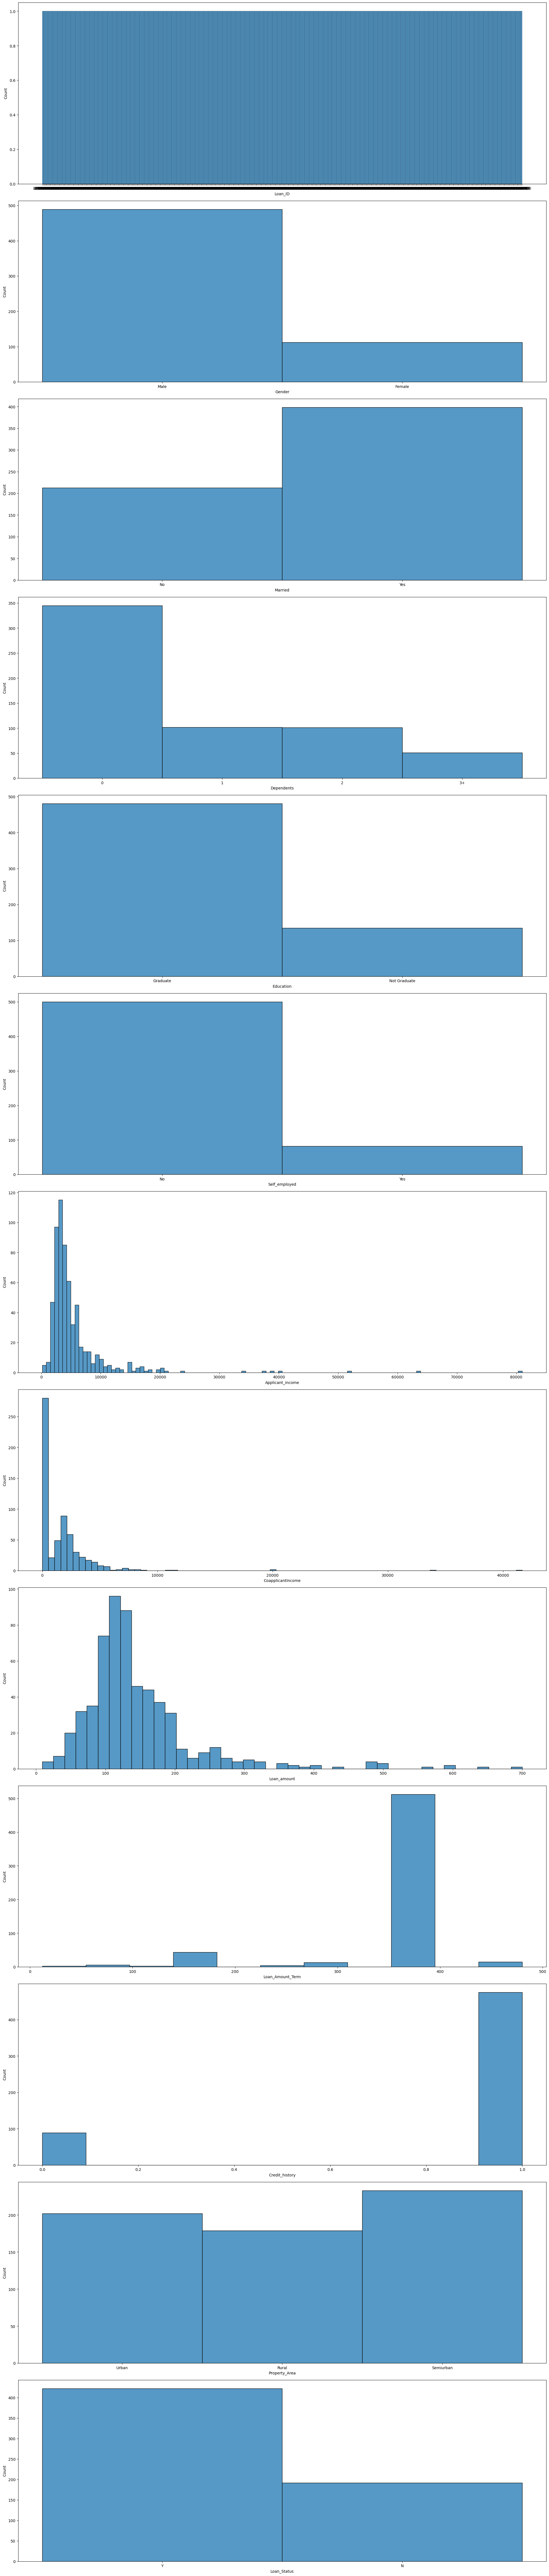

In [39]:
all_col_histplots(df)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_employed      614 non-null    float64
 5   Applicant_income   614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   Loan_amount        614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_history     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(12)
memory usage: 57.7 KB


In [49]:
# for col in cat_cols:
#     df[col] = df[col].astype('category')


In [50]:
# df[cat_cols] = df[cat_cols].apply(lambda x : x.cat.codes)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


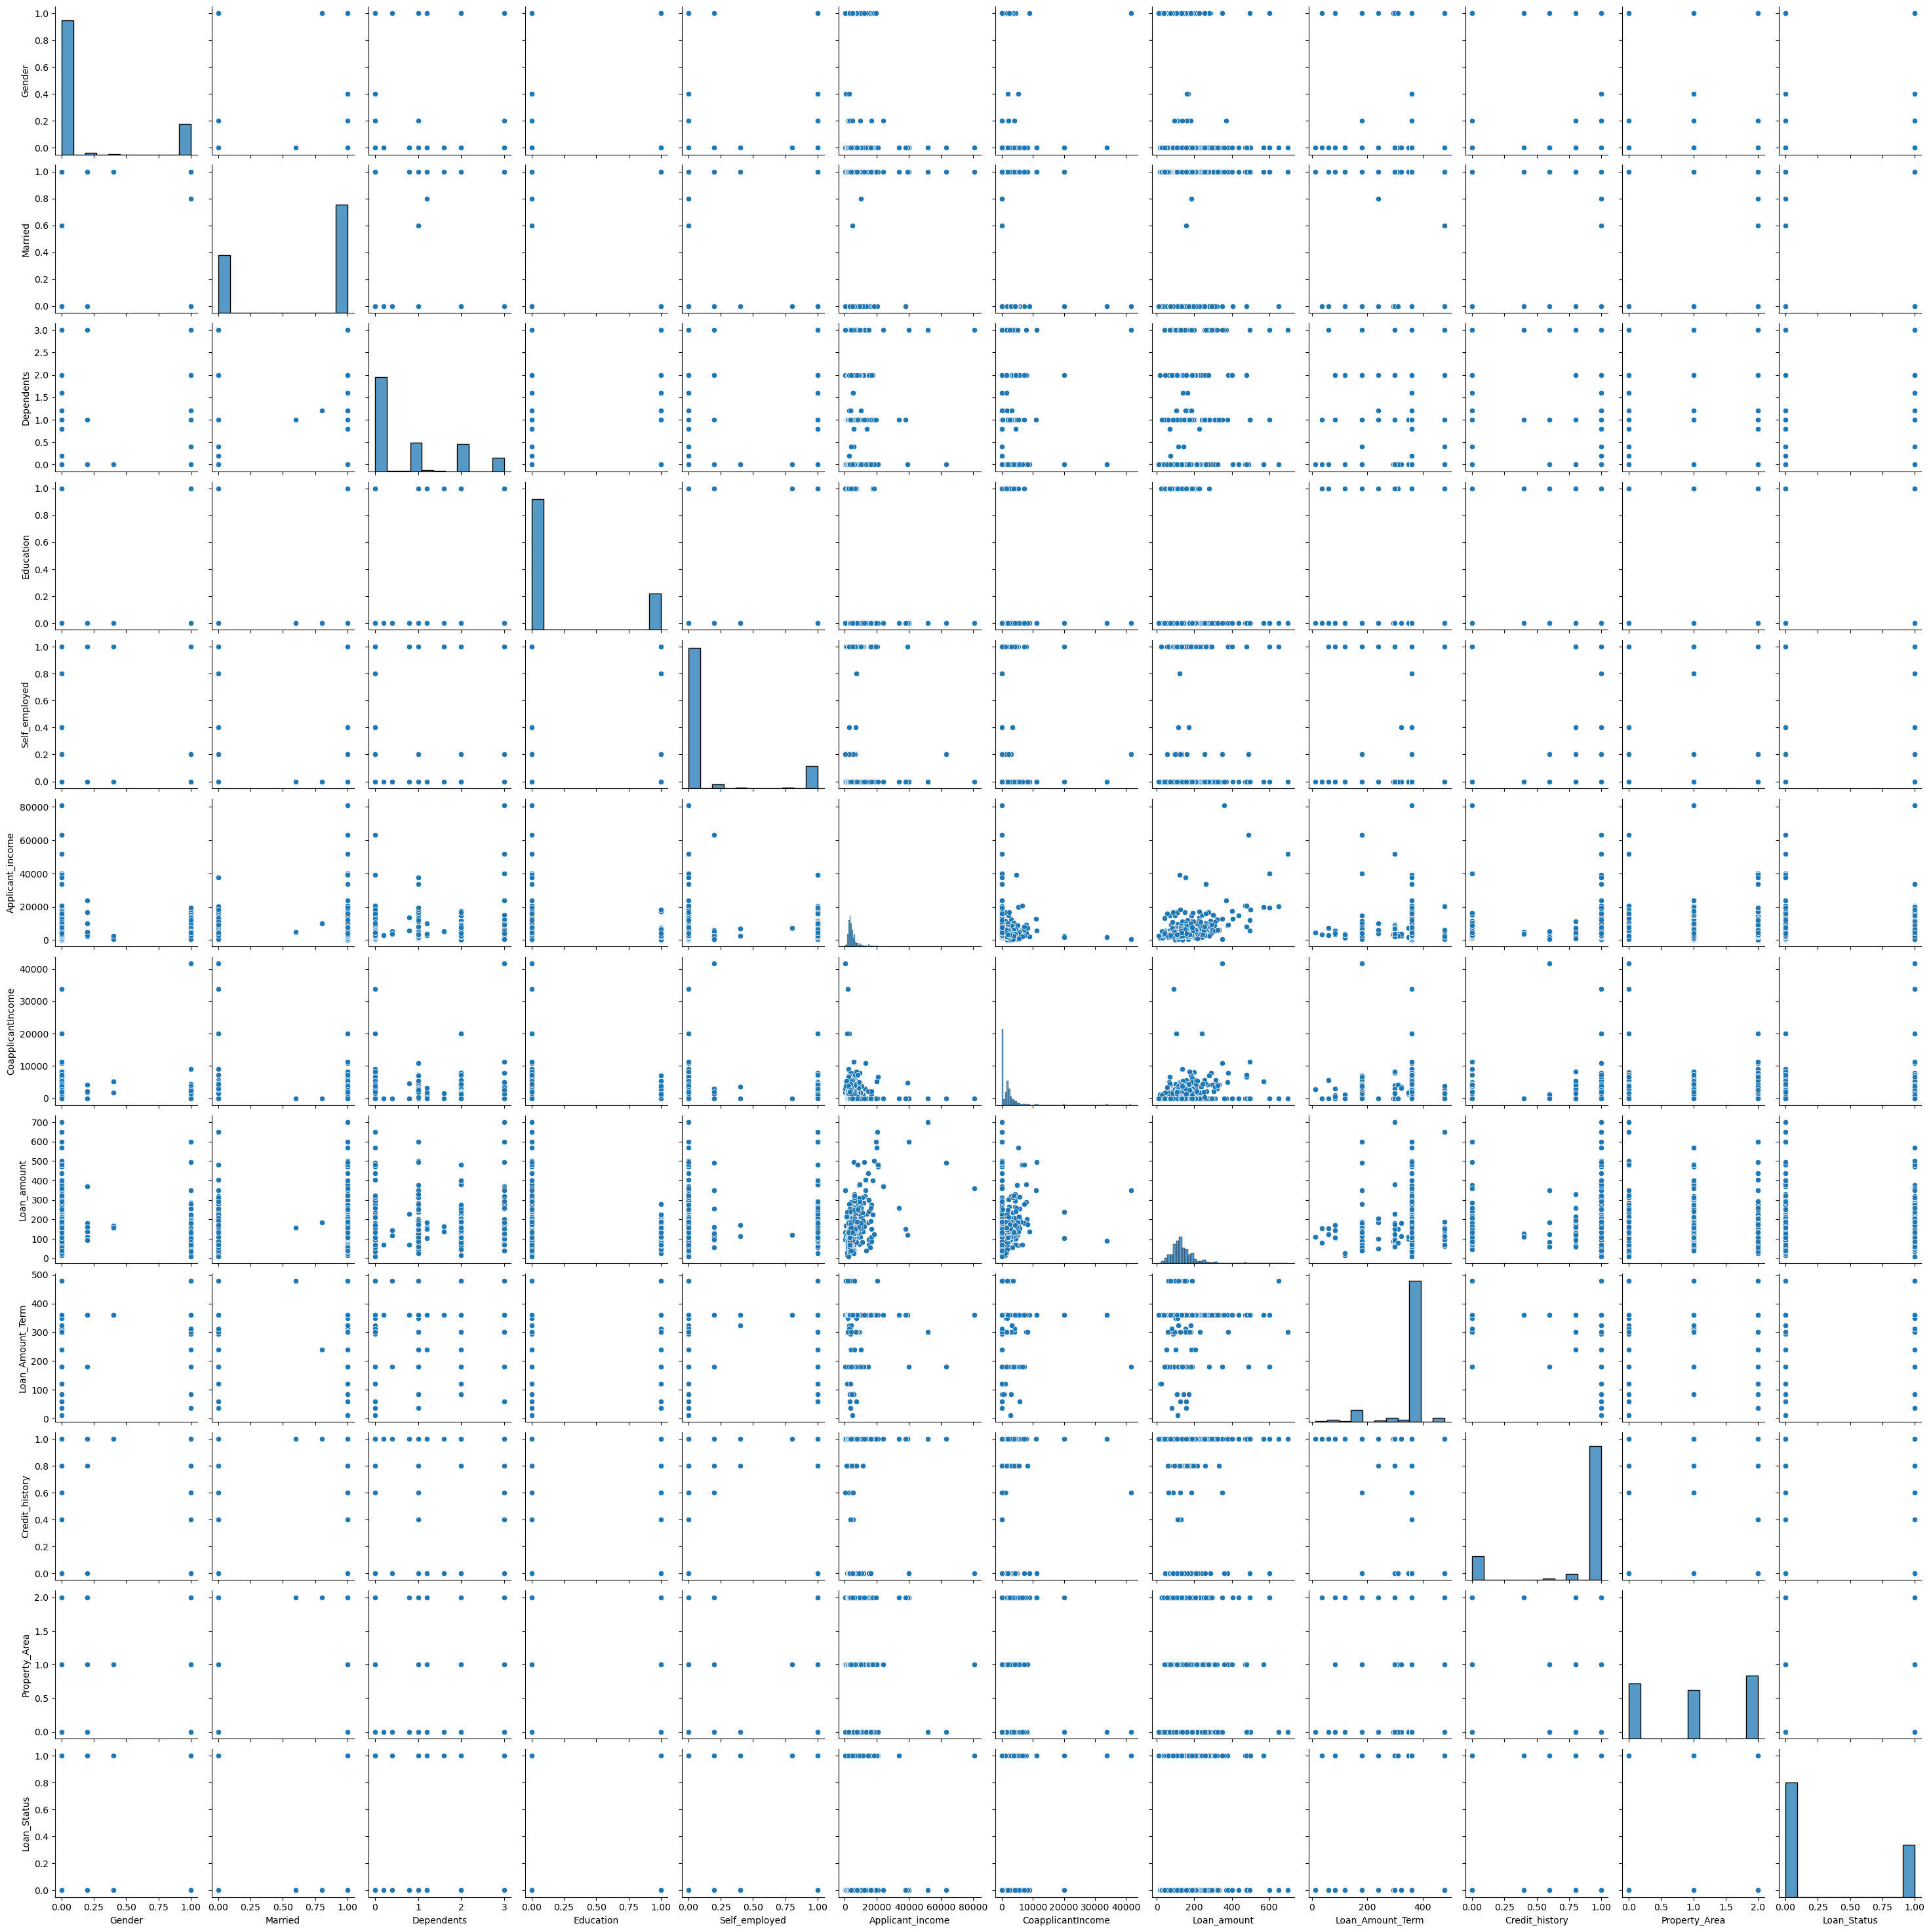

In [97]:
sns.pairplot(df)

We can see that the multicollinearity is very lesss comparitively. So we are good

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_employed      614 non-null    float64
 5   Applicant_income   614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   Loan_amount        614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_history     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(12)
memory usage: 57.7 KB


Checking VIF values for outliers influence

In [160]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))] 
vif['features'] = X.columns

vif

,values,features
0,1.177619,Gender
1,1.292350,Married
2,1.173993,Dependents
3,1.062886,Education
4,1.024028,Self_employed
5,1.675793,Applicant_income
6,1.141037,CoapplicantIncome
7,1.745203,Loan_amount
8,1.049394,Loan_Amount_Term
9,1.014649,Credit_history


We can see that Loan_amount, Loan_Amount_Term have outliers we need to handle those. Let's use some methods like boxcox or log transformations to make data evenly distributed. Since all the values are positive, we can use box_cox

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)
print(df)

[[-0.4821753  -1.37110552 -0.76283716 ...  0.44857574 -1.25029822
  -0.67451931]
 [-0.4821753   0.73143891  0.23244974 ...  0.44857574 -0.06009185
   1.48253724]
 [-0.4821753   0.73143891 -0.76283716 ...  0.44857574 -1.25029822
  -0.67451931]
 ...
 [-0.4821753   0.73143891  0.23244974 ...  0.44857574 -1.25029822
  -0.67451931]
 [-0.4821753   0.73143891  1.22773664 ...  0.44857574 -1.25029822
  -0.67451931]
 [ 2.11025581 -1.37110552 -0.76283716 ... -2.39086246  1.13011452
   1.48253724]]


In [165]:
df.rename(columns = {
          0:'Gender',
          1:'Married',
          2:'Dependents',
          3:'Education',
          4:'Self_employed',
          5:'Applicant_income',
          6:'CoapplicantIncome',
          7:'Loan_amount',
          8:'Loan_Amount_Term',
          9:'Credit_history',
          10:'Property_Area',
          11:'Loan_Status'
          },
         inplace=True)
df

,Gender,Married,Dependents,Education,Self_employed,Applicant_income,CoapplicantIncome,Loan_amount,Loan_Amount_Term,Credit_history,Property_Area,Loan_Status
0,-0.482175,-1.371106,-0.762837,-0.528362,-0.411756,0.072991,-0.554487,0.016934,0.279588,0.448576,-1.250298,-0.674519
1,-0.482175,0.731439,0.232450,-0.528362,-0.411756,-0.134412,-0.038732,-0.214901,0.279588,0.448576,-0.060092,1.482537
2,-0.482175,0.731439,-0.762837,-0.528362,2.521170,-0.393747,-0.554487,-0.940850,0.279588,0.448576,-1.250298,-0.674519
3,-0.482175,0.731439,-0.762837,1.892641,-0.411756,-0.462062,0.251980,-0.308572,0.279588,0.448576,-1.250298,-0.674519
4,-0.482175,-1.371106,-0.762837,-0.528362,-0.411756,0.097728,-0.554487,-0.062686,0.279588,0.448576,-1.250298,-0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.110256,-1.371106,-0.762837,-0.528362,-0.411756,-0.410130,-0.554487,-0.882306,0.279588,0.448576,-0.060092,-0.674519
610,-0.482175,0.731439,2.223024,-0.528362,-0.411756,-0.212557,-0.554487,-1.245280,-2.515081,0.448576,-0.060092,-0.674519
611,-0.482175,0.731439,0.232450,-0.528362,-0.411756,0.437174,-0.472404,1.248705,0.279588,0.448576,-1.250298,-0.674519
612,-0.482175,0.731439,1.227737,-0.528362,-0.411756,0.357064,-0.554487,0.475921,0.279588,0.448576,-1.250298,-0.674519


In [166]:
df.skew()

Gender               1.628702
Married             -0.641403
Dependents           0.973228
Education            1.367622
Self_employed        2.099996
Applicant_income     6.539513
CoapplicantIncome    7.491531
Loan_amount          2.678280
Loan_Amount_Term    -2.380277
Credit_history      -1.922231
Property_Area       -0.095601
Loan_Status          0.809998
dtype: float64

In [167]:
from scipy import stats
for col in X.columns:
    X[col],_ = stats.yeojohnson(X[col])
    

-1.0821669414417514
-0.7074775855714841
-1.141501346049851
-1.1350872785395878
-0.9876067075154662
-1.8426812200128564
-0.8266085885864827
-2.9112201230379475
-2.224921726973595
-0.35442282400503183
-1.1885364427005185


In [168]:
X.skew()

Gender               1.539601
Married             -0.636295
Dependents           0.447508
Education            1.367622
Self_employed        1.873128
Applicant_income     0.137218
CoapplicantIncome    0.298163
Loan_amount         -0.104418
Loan_Amount_Term     1.146319
Credit_history      -1.566289
Property_Area       -0.044571
dtype: float64

We cab see that there is a significant difference. Now it feels really good. Not much skewness

In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))] 
vif['features'] = X.columns

vif

,values,features
0,2.832738,Gender
1,1.807397,Married
2,1.432428,Dependents
3,2.282733,Education
4,3.347615,Self_employed
5,2.516329,Applicant_income
6,1.680447,CoapplicantIncome
7,2.044774,Loan_amount
8,1.110521,Loan_Amount_Term
9,2.712284,Credit_history


We can see that we have very less VIF and also handled outliers. It's time for us to train our model and test it.

In [202]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [181]:
classifiers = {
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
    'GradientBoosting': (GradientBoostingClassifier(), {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.01]}),
    'SVM': (SVC(), {'C': [1, 10], 'kernel': ['linear', 'rbf']})
    'KNN': (KNeighborsClassifier(),{'n_neigh'})
}

In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

0     -0.674519
1      1.482537
2     -0.674519
3     -0.674519
4     -0.674519
         ...   
609   -0.674519
610   -0.674519
611   -0.674519
612   -0.674519
613    1.482537
Name: Loan_Status, Length: 614, dtype: float64

In [183]:
bscore = 0
bmodel = ''

for cl, (clas, param_grid) in classifiers.items():
    
    grid_search = GridSearchCV(clas, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train,y_train)
    print(grid_search.best_score_)
    if grid_search.best_score_ > bscore:
        bscore = grid_search.best_score_
        bmodel = cl
        params = grid_search.best_params_
print(f"Best model: {bmodel} with accuracy {bscore:.4f}")

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 385, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 746, in _validate_y_class_weight
    check_classification_targets(y)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\multiclass.py", line 218, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'
